In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Đọc dữ liệu và chuẩn bị
# -------------------------------
df = pd.read_csv('iris.csv')
X = df.drop('species', axis=1).values  # Chỉ lấy đặc trưng, bỏ nhãn

# -------------------------------
# 2. Hàm tính khoảng cách Euclid
# -------------------------------
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# -------------------------------
# 3. Cài đặt K-Means thủ công
# -------------------------------
def kmeans(X, k, max_iters=100):
    # Khởi tạo ngẫu nhiên k tâm cụm từ các điểm dữ liệu
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        # Bước 1: Gán nhãn cụm cho mỗi điểm
        labels = np.array([np.argmin([euclidean(x, c) for c in centroids]) for x in X])

        # Bước 2: Tính lại các tâm cụm
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Nếu tâm không đổi nữa thì dừng
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# -------------------------------
# 4. Hàm tính WCSS (Elbow)
# -------------------------------
def compute_wcss(X, labels, centroids):
    wcss = 0
    for i, c in enumerate(centroids):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - c) ** 2)
    return wcss

# -------------------------------
# 5. Tính Silhouette Score thủ công
# -------------------------------
def silhouette_score_manual(X, labels):
    n = len(X)
    scores = []
    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == j] for j in set(labels) if j != labels[i]]
        
        # a: khoảng cách trung bình đến các điểm cùng cụm
        a = np.mean([euclidean(X[i], p) for p in same_cluster if not np.array_equal(X[i], p)])
        
        # b: khoảng cách trung bình nhỏ nhất đến cụm khác
        b = min([np.mean([euclidean(X[i], p) for p in cluster]) for cluster in other_clusters])
        
        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        scores.append(s)
    
    return np.mean(scores)


In [6]:
wcss_list = []
silhouette_list = []
K_range = range(2, 11)

for k in K_range:
    labels, centroids = kmeans(X, k)
    wcss = compute_wcss(X, labels, centroids)
    sil_score = silhouette_score_manual(X, labels)
    
    wcss_list.append(wcss)
    silhouette_list.append(sil_score)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


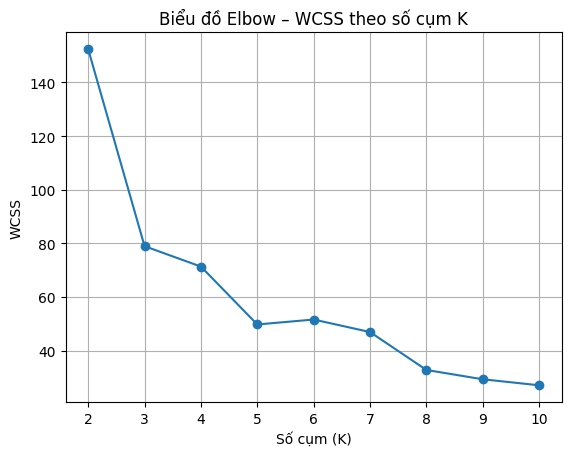

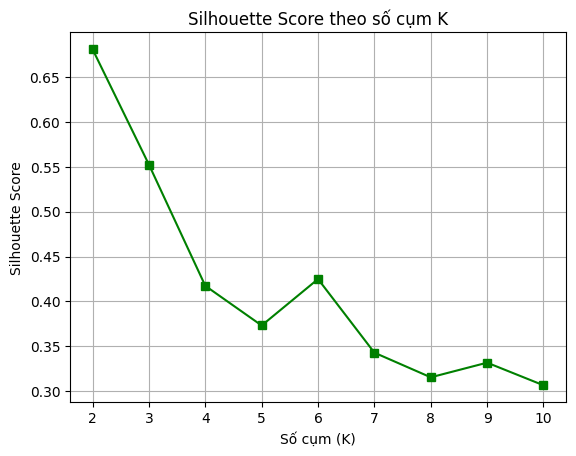

In [7]:
plt.figure()
plt.plot(K_range, wcss_list, marker='o')
plt.title("Biểu đồ Elbow – WCSS theo số cụm K")
plt.xlabel("Số cụm (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(K_range, silhouette_list, marker='s', color='green')
plt.title("Silhouette Score theo số cụm K")
plt.xlabel("Số cụm (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


Số cụm tối ưu là: 2


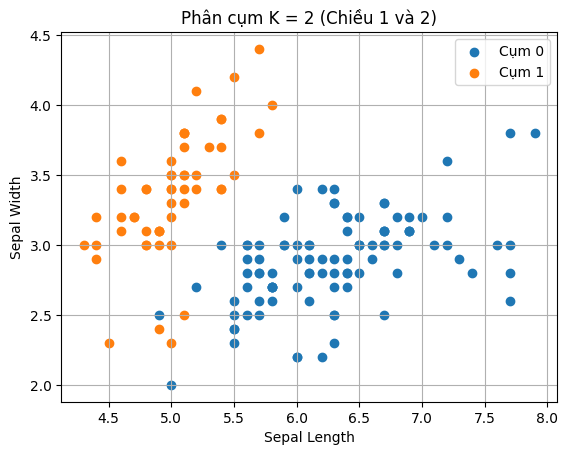

In [8]:
# Chọn K có silhouette cao nhất
optimal_k = K_range[np.argmax(silhouette_list)]
print("Số cụm tối ưu là:", optimal_k)

# Phân cụm lại với K tối ưu
labels, centroids = kmeans(X, optimal_k)

# Vẽ bằng 2 chiều đầu tiên
plt.figure()
for i in range(optimal_k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cụm {i}')
plt.title(f'Phân cụm K = {optimal_k} (Chiều 1 và 2)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()
